In [1]:
using CSV
using DataFrames
using GLM
using StatsBase 
using Distributions
using PrettyTables 
using StatsModels
using CategoricalArrays


In [2]:
weightgain = CSV.read("/Users/VSR/Desktop/Capstone/ANOVA/weightgain.csv", DataFrame)

Row,source,type,weightgain
,String7,String7,Int64
1,Beef,Low,90
2,Beef,Low,76
3,Beef,Low,90
4,Beef,Low,64
5,Beef,Low,86
6,Beef,Low,51
7,Beef,Low,72
8,Beef,Low,90
9,Beef,Low,95


In [3]:
# Fit the model (two-way ANOVA)
model = lm(@formula(weightgain ~ source * type), weightgain)



StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

weightgain ~ 1 + source + type + source & type

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                            Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)                 100.0     4.72858  21.15    <1e-21   90.41      109.59
source: Cereal              -14.1     6.68722  -2.11    0.0420  -27.6623     -0.537693
type: Low                   -20.8     6.68722  -3.11    0.0036  -34.3623     -7.23769
source: Cereal & type: Low   18.8     9.45715   1.99    0.0545   -0.379999   37.98
──────────────────────────────────────────────────────────────────────────────────────

In [4]:
predicted_values = predict(model)

40-element Vector{Float64}:
  79.19999999999999
  79.19999999999999
  79.19999999999999
  79.19999999999999
  79.19999999999999
  79.19999999999999
  79.19999999999999
  79.19999999999999
  79.19999999999999
  79.19999999999999
 100.00000000000004
 100.00000000000004
 100.00000000000004
   ⋮
  83.89999999999998
  83.89999999999998
  85.89999999999999
  85.89999999999999
  85.89999999999999
  85.89999999999999
  85.89999999999999
  85.89999999999999
  85.89999999999999
  85.89999999999999
  85.89999999999999
  85.89999999999999

In [5]:
# Display the summary which includes the ANOVA results
println(summary(model))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}


In [6]:

# Get the total number of observations
N = nrow(weightgain)



40

In [7]:
overall_mean = mean(weightgain.weightgain)

87.25

In [8]:
# Calculate means for source, type, and their interaction
means_source = combine(groupby(weightgain, :source), :weightgain => mean => :mean_weightgain)


Row,source,mean_weightgain
,String7,Float64
1,Beef,89.6
2,Cereal,84.9


In [9]:
means_type = combine(groupby(weightgain, :type), :weightgain => mean => :mean_weightgain)

Row,type,mean_weightgain
,String7,Float64
1,Low,81.55
2,High,92.95


In [10]:
means_interaction = combine(groupby(weightgain, [:source, :type]), :weightgain => mean => :mean_weightgain)

Row,source,type,mean_weightgain
,String7,String7,Float64
1,Beef,Low,79.2
2,Beef,High,100.0
3,Cereal,Low,83.9
4,Cereal,High,85.9


In [11]:
# Display the means
println("Overall Mean: ", overall_mean)
println("Means by Source: ", means_source)
println("Means by Type: ", means_type)
println("Means by Source and Type: ", means_interaction)

Overall Mean: 87.25
Means by Source: 2×2 DataFrame
 Row │ source   mean_weightgain 
     │ String7  Float64         
─────┼──────────────────────────
   1 │ Beef                89.6
   2 │ Cereal              84.9
Means by Type: 2×2 DataFrame
 Row │ type     mean_weightgain 
     │ String7  Float64         
─────┼──────────────────────────
   1 │ Low                81.55
   2 │ High               92.95
Means by Source and Type: 4×3 DataFrame
 Row │ source   type     mean_weightgain 
     │ String7  String7  Float64         
─────┼───────────────────────────────────
   1 │ Beef     Low                 79.2
   2 │ Beef     High               100.0
   3 │ Cereal   Low                 83.9
   4 │ Cereal   High                85.9


## SUM of Squares

In [12]:
SS_total = sum((weightgain.weightgain .- overall_mean).^2)


10453.5

In [13]:
SS_between_source = sum([count(weightgain.source .== s) * (mean(weightgain.weightgain[weightgain.source .== s]) - overall_mean)^2 for s in unique(weightgain.source)])


220.89999999999893

In [14]:
SS_between_type = sum([count(weightgain.type .== t) * (mean(weightgain.weightgain[weightgain.type .== t]) - overall_mean)^2 for t in unique(weightgain.type)])


1299.6000000000013

In [15]:
residuals = weightgain.weightgain .- predicted_values
SS_residual = sum(residuals.^2)

8049.400000000001

In [16]:
SS_between_interaction = SS_total-(SS_between_source + SS_between_type + SS_residual )

883.5999999999985

## Degree of Freedom

In [17]:
# Calculate degrees of freedom
df_source = length(unique(weightgain.source)) - 1


1

In [18]:
df_type = length(unique(weightgain.type)) - 1


1

In [19]:
df_interaction = df_source * df_type


1

In [20]:
df_residual = N - (length(unique(weightgain.source)) * length(unique(weightgain.type)))


36

# Mean Square Calculation


In [21]:
MS_source = SS_between_source / df_source

220.89999999999893

In [22]:
MS_type = SS_between_type / df_type


1299.6000000000013

In [23]:
MS_interaction = SS_between_interaction / df_interaction


883.5999999999985

In [24]:
MS_residual = SS_residual / df_residual


223.59444444444446

# F value

In [25]:
F_source = MS_source / MS_residual


0.9879494123785575

In [26]:
F_type = MS_type / MS_residual

5.812308991974563

In [27]:
F_interaction = MS_interaction / MS_residual


3.951797649514243

# P

In [28]:
using HypothesisTests

In [29]:
p_source = 1 - cdf(HypothesisTests.FDist(df_source, df_residual), F_source)

0.32687831608407236

In [30]:
# Calculate p-values
p_source = 1 - cdf(HypothesisTests.FDist(df_source, df_residual), F_source)
p_type = 1 - cdf(FDist(df_type, df_residual), F_type)
p_interaction = 1 - cdf(FDist(df_interaction, df_residual), F_interaction)


0.054467569865000565

In [31]:
# Display the ANOVA-like table
println("Source         Df   Sum Sq   Mean Sq   F value   Pr(>F)")
println("source         ", df_source, "   ", SS_between_source, "   ", MS_source, "   ", F_source, "   ", p_source)
println("type           ", df_type, "   ", SS_between_type, "   ", MS_type, "   ", F_type, "   ", p_type)
println("source:type    ", df_interaction, "   ", SS_between_interaction, "   ", MS_interaction, "   ", F_interaction, "   ", p_interaction)
println("Residuals      ", df_residual, "   ", SS_residual, "   ", MS_residual)

Source         Df   Sum Sq   Mean Sq   F value   Pr(>F)
source         1   220.89999999999893   220.89999999999893   0.9879494123785575   0.32687831608407236
type           1   1299.6000000000013   1299.6000000000013   5.812308991974563   0.021144905965364225
source:type    1   883.5999999999985   883.5999999999985   3.951797649514243   0.054467569865000565
Residuals      36   8049.400000000001   223.59444444444446


In [32]:
p_source = 1 - cdf(FDist(df_source, df_residual), F_source)


0.32687831608407236

In [33]:
p_type = 1 - cdf(FDist(df_type, df_residual), F_type)


0.021144905965364225

In [34]:
p_interaction = 1 - cdf(FDist(df_interaction, df_residual), F_interaction)


0.054467569865000565

In [35]:
# Display the ANOVA-like table with rounded values
println("Source         Df Sum Sq Mean Sq   F value   Pr(>F)")
println("source         ", df_source, "   ", round(SS_between_source, digits=3), "   ", round(MS_source, digits=3), "   ", round(F_source, digits=3), "   ", round(p_source, digits=3))
println("type           ", df_type, "   ", round(SS_between_type, digits=3), "   ", round(MS_type, digits=3), "   ", round(F_type, digits=3), "   ", round(p_type, digits=3))
println("source:type    ", df_interaction, "   ", round(SS_between_interaction, digits=3), "   ", round(MS_interaction, digits=3), "   ", round(F_interaction, digits=3), "   ", round(p_interaction, digits=3))
println("Residuals      ", df_residual, "   ", round(SS_residual, digits=3), "   ", round(MS_residual, digits=3))

Source         Df Sum Sq Mean Sq   F value   Pr(>F)
source         1   220.9   220.9   0.988   0.327
type           1   1299.6   1299.6   5.812   0.021
source:type    1   883.6   883.6   3.952   0.054
Residuals      36   8049.4   223.594


In [36]:
coefficients = coef(model)

4-element Vector{Float64}:
 100.00000000000004
 -14.10000000000005
 -20.800000000000047
  18.800000000000047

In [37]:
println("Coefficients:")
println(coefficients)

Coefficients:
[100.00000000000004, -14.10000000000005, -20.800000000000047, 18.800000000000047]


In [38]:
coeff_names = coefnames(model)


4-element Vector{String}:
 "(Intercept)"
 "source: Cereal"
 "type: Low"
 "source: Cereal & type: Low"

In [39]:
# Create a DataFrame to display coefficients with names
coef_df = DataFrame(Name = coeff_names, Estimate = coefficients)


Row,Name,Estimate
,String,Float64
1,(Intercept),100.0
2,source: Cereal,-14.1
3,type: Low,-20.8
4,source: Cereal & type: Low,18.8


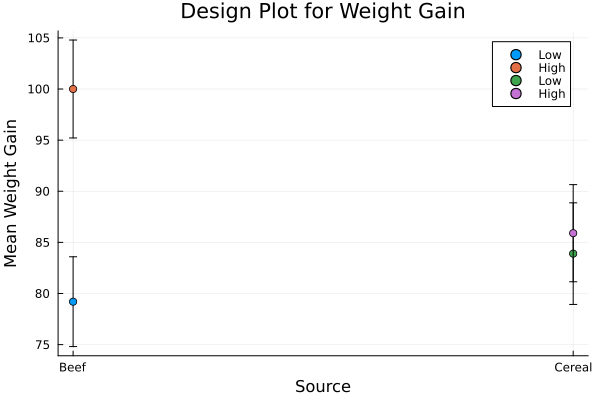

In [40]:
using CSV
using DataFrames
using Plots
using Statistics
using CategoricalArrays


# Calculate mean and standard error for each combination of factors
summary_stats = combine(groupby(weightgain, [:source, :type]), 
    :weightgain => mean => :mean_weightgain,
    :weightgain => std => :std_weightgain,
    nrow => :count)

# Calculate standard error
summary_stats[:, :se] .= summary_stats.std_weightgain ./ sqrt.(summary_stats.count)

# Convert `type` to a CategoricalArray with desired order
summary_stats.type = CategoricalArray(summary_stats.type, levels=["High", "Low"], ordered=true)

# Set up the plot
plot(title="Design Plot for Weight Gain",
     xlabel="Source", ylabel="Mean Weight Gain",
     legend=false)

# Loop through each combination of source and type for the plot
for row in eachrow(summary_stats)
    # Extract values
    mean_value = row.mean_weightgain
    se_value = row.se
    source = row.source
    type = row.type

    # Scatter plot with error bars
    scatter!([source], [mean_value], 
              yerror=[se_value], 
              label=type,
              marker=:circle,
              line=:solid,
              legend=:topright)  # Add a legend
end

# Display the plot
plot!()  # Finalize the plot to show

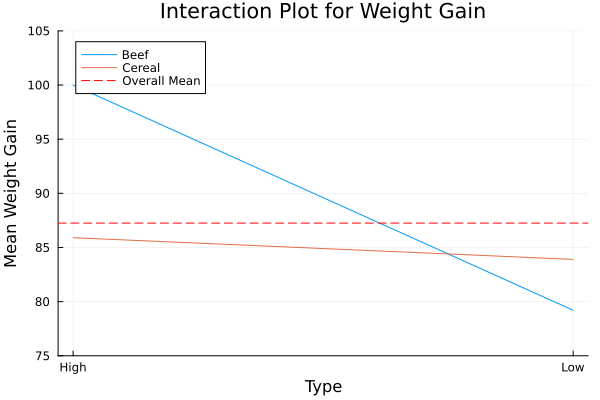

In [41]:
# Calculate mean weight gain for each combination of factors
interaction_means = combine(groupby(weightgain, [:source, :type]), :weightgain => mean => :mean_weightgain)

# Convert type to a CategoricalArray with desired order
interaction_means.type = CategoricalArray(interaction_means.type, levels=["High", "Low"], ordered=true)

# Set up the plot
plot(title="Interaction Plot for Weight Gain",
     xlabel="Type", ylabel="Mean Weight Gain",
     legend=:topright, 
     xticks=(1:2, ["High", "Low"]),  # Set ticks explicitly
     ylims=(75, 105),                # Adjust y-axis limits for clarity
     marker=:circle)                 # Set marker style for clarity

# Loop through each source and plot its corresponding means for each type
for source in unique(weightgain.source)
    # Extract means for the current source
    means = interaction_means.mean_weightgain[interaction_means.source .== source]
    
    # Check if means are available
    if !isempty(means)
        # Plot with lines for each source
        plot!(interaction_means.type[interaction_means.source .== source], means, 
              label=source, 
              line=:solid,  # Solid line for clarity
              legend=:topleft)  # Position of the legend
    end
end

hline!([mean(weightgain.weightgain)], label="Overall Mean", color=:red, linestyle=:dash)


### Foster Feeding of Rats (Two-Way ANOVA and Tukey HSD)


In [42]:
foster = CSV.read("/Users/VSR/Desktop/Capstone/ANOVA/foster.csv", DataFrame)

Row,litgen,motgen,weight
,String1,String1,Float64
1,A,A,61.5
2,A,A,68.2
3,A,A,64.0
4,A,A,65.0
5,A,A,59.7
6,A,B,55.0
7,A,B,42.0
8,A,B,60.2
9,A,I,52.5


In [43]:
using CSV
using DataFrames
using GLM
using Statistics

# Load the dataset
foster = CSV.read("/Users/VSR/Desktop/Capstone/ANOVA/foster.csv", DataFrame)

# Fit the model (two-way ANOVA)
model = lm(@formula(weight ~ litgen * motgen), foster)

# Display the summary which includes the ANOVA results
println(summary(model))



StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}


In [44]:
# Calculate ANOVA-like statistics manually
# First, calculate the overall mean
overall_mean = mean(foster.weight)

# Calculate means for each level of litgen and motgen
means_litgen = combine(groupby(foster, :litgen), :weight => mean => :mean_weight)
means_motgen = combine(groupby(foster, :motgen), :weight => mean => :mean_weight)
means_interaction = combine(groupby(foster, [:litgen, :motgen]), :weight => mean => :mean_weight)



Row,litgen,motgen,mean_weight
,String1,String1,Float64
1,A,A,63.68
2,A,B,52.4
3,A,I,54.125
4,A,J,48.96
5,B,A,52.325
6,B,B,60.64
7,B,I,53.925
8,B,J,45.9
9,I,A,47.1


In [45]:
n = nrow(foster)

61

In [46]:
# Degrees of freedom using length(unique(...))
df_total = n - 1

60

In [47]:
df_litgen = length(unique(foster.litgen)) - 1


3

In [48]:
df_motgen = length(unique(foster.motgen)) - 1


3

In [49]:
df_interaction = df_litgen * df_motgen


9

In [50]:
# Calculate the sum of squares for each factor and interaction
SS_total = sum((foster.weight .- overall_mean).^2)


4100.1268852459025

In [51]:
SS_litgen = sum([count(foster.litgen .== l) * (mean(foster.weight[foster.litgen .== l]) - overall_mean)^2 for l in unique(foster.litgen)])


60.15728580612596

In [52]:
SS_motgen = sum([count(foster.motgen .== m) * (mean(foster.weight[foster.motgen .== m]) - overall_mean)^2 for m in unique(foster.motgen)])


771.6053852459012

In [53]:
predicted_values = predict(model)


61-element Vector{Float64}:
 63.6800000000001
 63.6800000000001
 63.6800000000001
 63.6800000000001
 63.6800000000001
 52.39999999999992
 52.39999999999992
 52.39999999999992
 54.124999999999986
 54.124999999999986
 54.124999999999986
 54.124999999999986
 48.96000000000001
  ⋮
 54.349999999999994
 56.10000000000001
 56.10000000000001
 56.10000000000001
 54.53333333333332
 54.53333333333332
 54.53333333333332
 49.06
 49.06
 49.06
 49.06
 49.06

In [54]:
residuals = foster.weight .- predicted_values
SS_residual = sum(residuals.^2)

2440.8165

In [55]:
SS_interaction = SS_total - (SS_litgen + SS_motgen + SS_residual)


827.5477141938754

In [68]:
MS_litgen = SS_litgen / df_litgen


20.05242860204199

In [69]:
MS_motgen = SS_motgen / df_motgen


257.2017950819671

In [70]:
MS_interaction = SS_between_interaction / df_interaction


98.17777777777762

In [71]:
MS_residual = SS_residual / (nrow(foster) - df_litgen - df_motgen - 1)


45.20030555555555

In [72]:
F_litgen = MS_litgen / MS_residual
F_motgen = MS_motgen / MS_residual
F_interaction = MS_interaction / MS_residual

2.172060046300077

In [74]:

# Display ANOVA-like table
println("Source        Df   Sum Sq   Mean Sq   F value")
println("litgen        ", df_litgen, "   ", SS_litgen, "   ", MS_litgen, "   ", F_litgen)
println("motgen        ", df_motgen, "   ", SS_motgen, "   ", MS_motgen, "   ", F_motgen)
println("litgen:motgen ", df_interaction, "   ", SS_interaction, "   ", MS_interaction, "   ", F_interaction)
println("Residuals     ", (n - df_litgen - df_motgen - df_interaction - 1), "   ", SS_residual, "   ", MS_residual)

Source        Df   Sum Sq   Mean Sq   F value
litgen        3   60.15728580612596   20.05242860204199   0.443634801923974
motgen        3   771.6053852459012   257.2017950819671   5.69026673427774
litgen:motgen 9   827.5477141938754   98.17777777777762   2.172060046300077
Residuals     45   2440.8165   45.20030555555555


In [75]:
using CSV
using DataFrames
using GLM
using Statistics
using Distributions

# Load the dataset
foster = CSV.read("/Users/VSR/Desktop/Capstone/ANOVA/foster.csv", DataFrame)

# Fit the model (two-way ANOVA)
model = lm(@formula(weight ~ litgen * motgen), foster)

# Display the summary which includes the ANOVA results
println(summary(model))

# Extract unique levels of 'motgen'
motgen_levels = levels(foster.motgen)

# Get the group means and sizes
group_means = [mean(foster.weight[foster.motgen .== level]) for level in motgen_levels]
group_sizes = [count(foster.motgen .== level) for level in motgen_levels]

# Calculate the overall mean
overall_mean = mean(foster.weight)

# Calculate the standard error for the pairwise differences
n = nrow(foster)
alpha = 0.05  # Significance level
q_crit = quantile(TDist(n - length(motgen_levels)), 1 - alpha / 2)  # Critical value for Tukey's HSD

# Prepare to store results
results = []

# Compute pairwise comparisons
for i in 1:length(motgen_levels)
    for j in i+1:length(motgen_levels)
        diff = group_means[i] - group_means[j]
        std_err = sqrt((var(foster.weight[foster.motgen .== motgen_levels[i]]) / group_sizes[i]) +
                        (var(foster.weight[foster.motgen .== motgen_levels[j]]) / group_sizes[j]))
        
        lwr = diff - q_crit * std_err
        upr = diff + q_crit * std_err
        
        # Calculate p-value (two-tailed)
        t_stat = abs(diff) / std_err
        p_val = 2 * (1 - cdf(TDist(n - length(motgen_levels)), t_stat))

        # Store the results
        push!(results, (motgen_levels[i], motgen_levels[j], diff, lwr, upr, p_val))
    end
end

# Display results in a formatted way
println("Tukey's Honest Significant Differences (HSD) Results:")
println("Comparison   |   Diff   |   Lwr   |   Upr   |   p adj")
for (level1, level2, diff, lwr, upr, p_adj) in results
    println("$level1-$level2 | $diff | $lwr | $upr | $p_adj")
end

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}
Tukey's Honest Significant Differences (HSD) Results:
Comparison   |   Diff   |   Lwr   |   Upr   |   p adj
A-B | -3.29999999999999 | -9.587395162312735 | 2.9873951623127555 | 0.2976880386391001
A-I | 2.0374999999999943 | -3.873897507597058 | 7.948897507597047 | 0.4928717135772249
A-J | 6.720000000000006 | 0.7946024067299549 | 12.645397593270058 | 0.02694259488907691
B-I | 5.337499999999984 | 0.2919744490794871 | 10.383025550920483 | 0.03851761297628031
B-J | 10.019999999999996 | 4.958078997999128 | 15.081921002000865 | 0.00020789840054602493
I-J | 4.682500000000012 | 0.09596243924152681 | 9.269037560758496 | 0.045546736881964645
